In [360]:
from thesis.data import *
from thesis.measure import *
from thesis.partition import *
from thesis.draw import *

ModuleNotFoundError: No module named 'thesis'

In [ ]:
labels = mnist.getLabels(".")
alpha = 100
nClients = 10
partitionedData = dirichlet.partitionData(labels,alpha,nClients)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

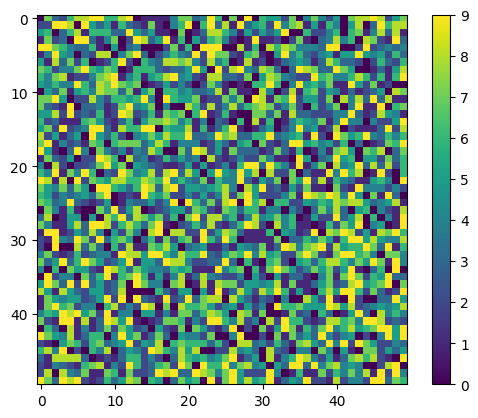

In [ ]:
fig, ax = plt.subplots()
uniform_data = np.random.randint(10, size=(50, 50))
new_viridis = matplotlib.colormaps.get_cmap('viridis')
img = plt.imshow(uniform_data, interpolation='nearest')
plt.colorbar(img,cmap=new_viridis)
plt.show()

/var/folders/fk/q2p10g6n10s5r3w2v7_1w9wh0000gn/T/ipykernel_61992/3911542850.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('rocket')


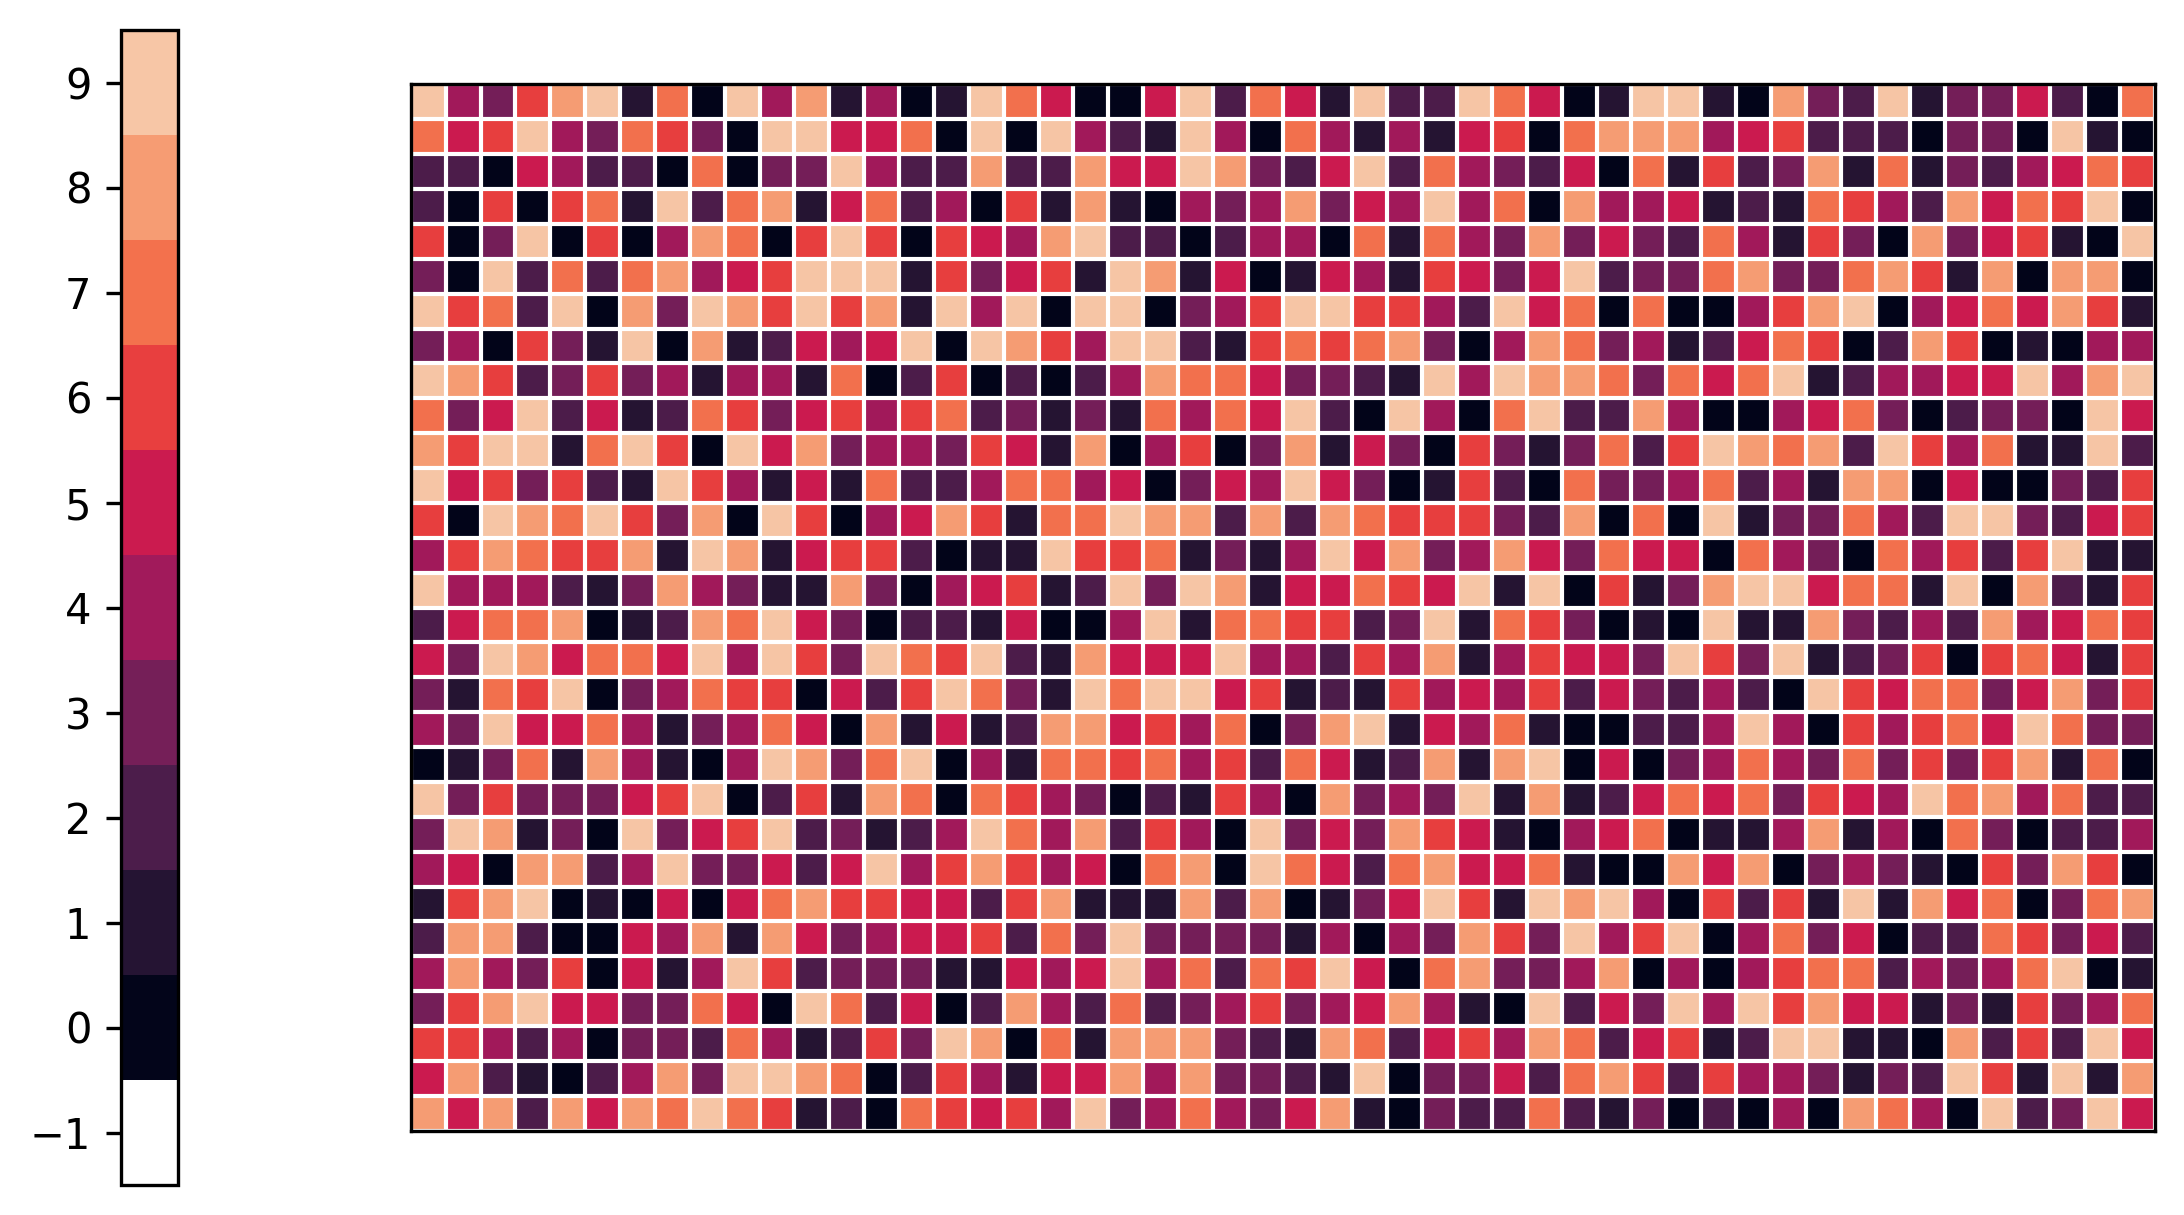

In [485]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import ticker

viridis = plt.cm.get_cmap('rocket')
n_steps = 10
colors = viridis(np.linspace(0, 0.9, n_steps))
colors = np.vstack(([1, 1, 1, 1],colors))
discrete_viridis = ListedColormap(colors)

fig, ax = plt.subplots(1, 1, figsize=(10, 5),dpi=300)
data = np.random.randint(10, size=(30, 50))  # Generate some random data
img = plt.imshow(data, cmap=discrete_viridis, vmin=0, vmax=9)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticks(np.arange(-0.5, data.shape[1]+.5, 1), minor=True)
ax.set_yticks(np.arange(-0.5, data.shape[0]+.5, 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
ax.tick_params(which='minor', bottom=False, left=False)
cbar = plt.colorbar(img, ticks=ticker.FixedLocator(np.linspace(-1, 9, n_steps+1)),location="left")
tick_labels = [str(i)+"tesr" for i in range(n_steps+1)]
cbar.ax.set_yticklabels(tick_labels)
plt.clim(-1.5,9.5)
plt.show()

Text(0, 0.5, 'Frequency')

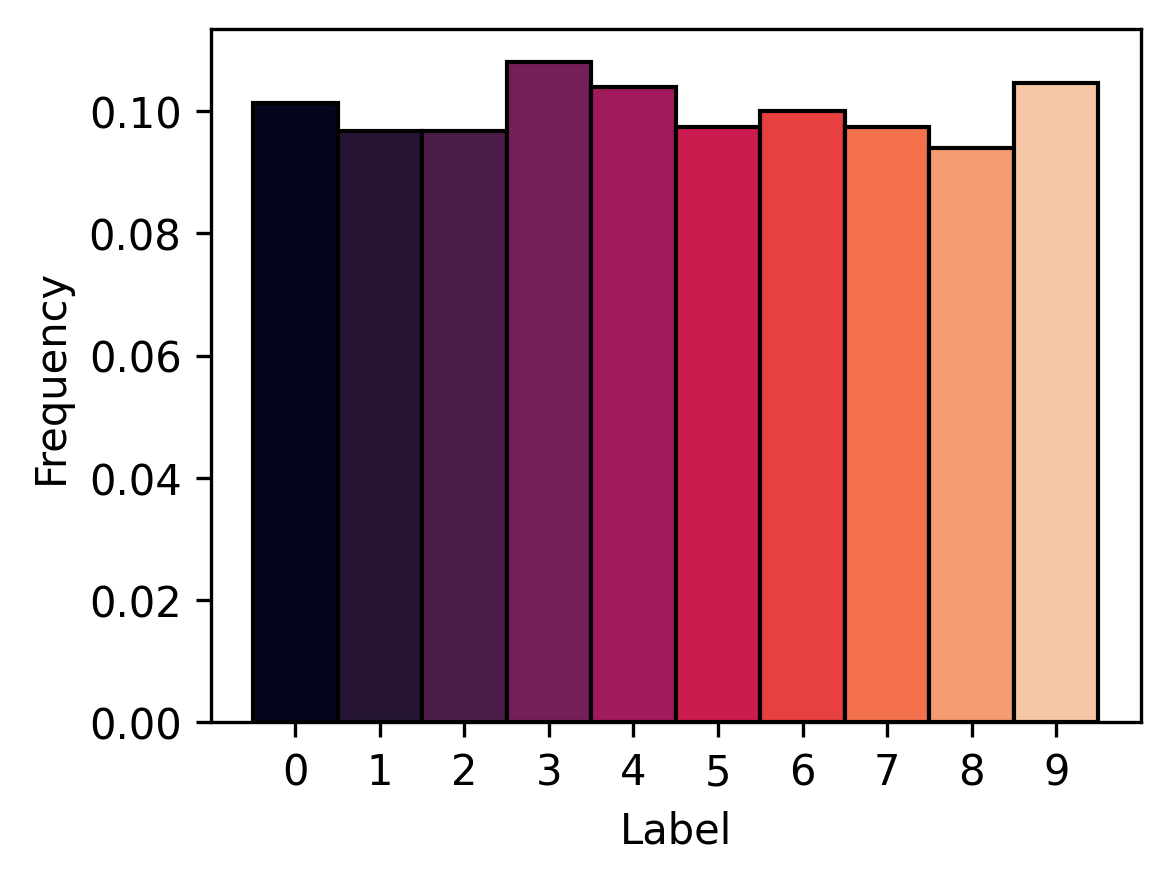

In [495]:
flat = data.flatten()

fig, ax = plt.subplots(1, 1, figsize=(4, 3),dpi=300)
N, bins, patches =ax.hist(flat,[-0.5+i for i in range(11)], density=True,lw=1,ec="k",fc=[0.8,0.8,0.8], alpha=1)
for i in range(len(N)):
   patches[i].set_facecolor(colors[i+1])

ax.set_xticks([i for i in range(10)])
#ax.set_xticks(np.arange(-0.5, 9.5, 1), minor=True)
ax.grid(which='minor', color='k', linestyle='-', linewidth=1)
plt.xlabel("Label")
plt.ylabel("Frequency")


In [467]:
new_matrices = {}
for value in range(10):  # Assuming integers are from 0 to 9
    ncols= 10
    # Count the occurrences of the integer value in the original matrix
    count = np.count_nonzero(data == value)
    # Calculate the minimum number of rows to accommodate the occurrences
    min_rows = int(np.ceil(count /ncols))
    # Create a new matrix filled with the integer value
    new_matrix = np.full((min_rows, ncols), value)
    # Fill any remaining cells with a placeholder (e.g., -1)
    new_matrix[-1,-(count % ncols):] = -1
    # Store the new matrix in the dictionary
    new_matrices[value] = new_matrix
# Access a matrix for a specific integer, for example, integer 3
matrix_for_3 = new_matrices[3]


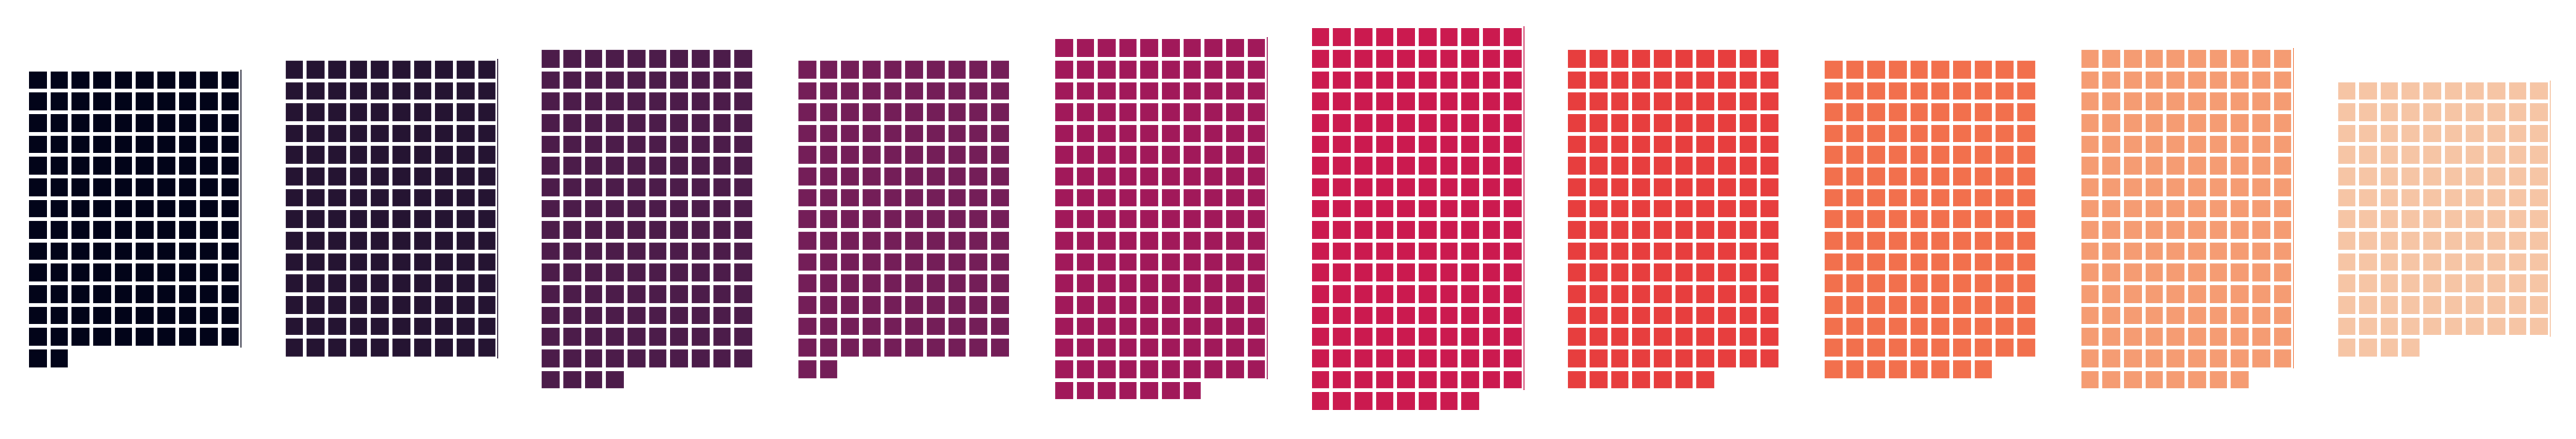

In [471]:
fig, axs = plt.subplots(1, 10, figsize=(12,6), dpi=300)
for i,ax in enumerate(axs):
    ax.imshow(new_matrices[i], cmap=discrete_viridis, vmin=-1, vmax=9)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks(np.arange(-0.5, (new_matrices[i]).shape[1]+0.5, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, (new_matrices[i]).shape[0]+0.5, 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
    ax.tick_params(which='minor', bottom=False, left=False)

plt.show()

In [386]:
import random
def divide_uniformly(matrix,n):
    flat = matrix.flatten()
    flat = flat[flat != -1]
    size = len(flat)
    partitions = [[] for _ in range(n)]
    for i in range(size):
        partitions[random.randint(0, n-1)].append(flat[i])
    return partitions

allMatrices = {}
for value in range(10):
    matrix = new_matrices[value]
    partitions = divide_uniformly(matrix,4)
    partitionedMatrices = {}
    ncols= 8
    for i,partition in enumerate(partitions):
        count = len(partition)
        # Calculate the minimum number of rows to accommodate the occurrences
        min_rows = int(np.ceil(count /ncols))
        # Create a new matrix filled with the integer value
        new_matrix = np.full((min_rows, ncols), value)
        # Fill any remaining cells with a placeholder (e.g., -1)
        new_matrix[-1,-(count % ncols):] = -1
        # Store the new matrix in the dictionary
        partitionedMatrices[i] = new_matrix
    allMatrices[value] = partitionedMatrices

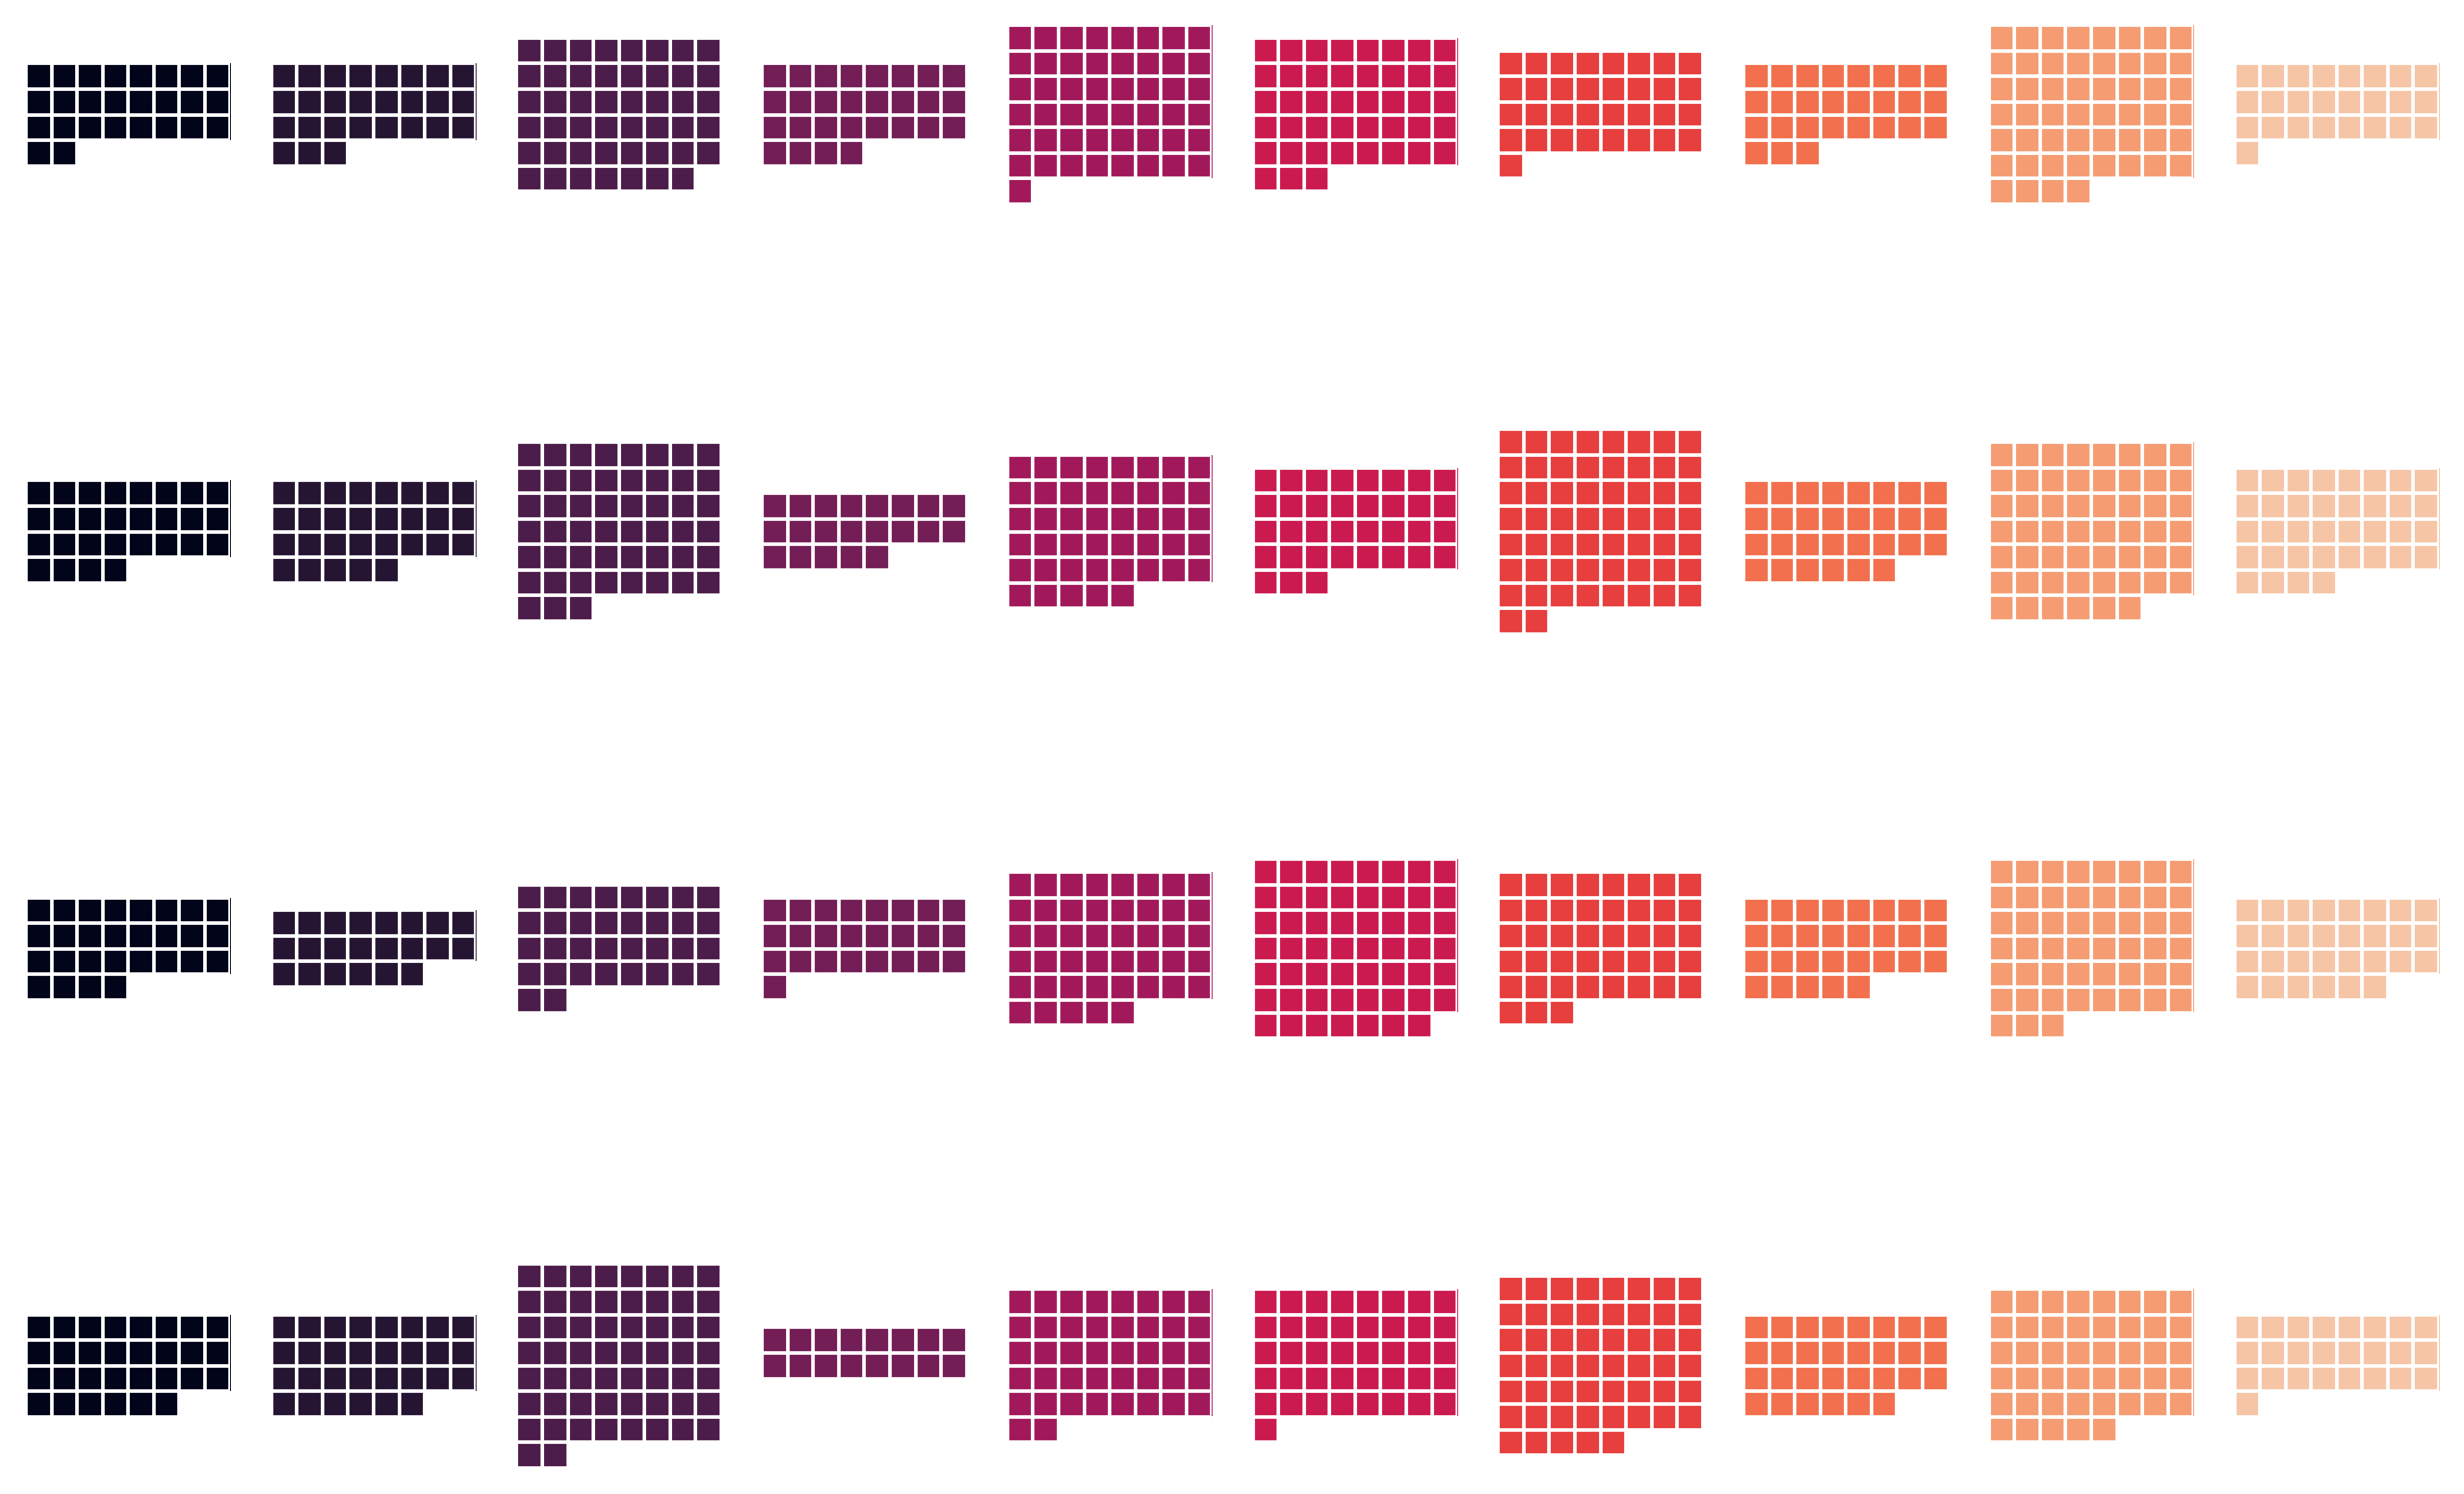

In [479]:

fig, axss = plt.subplots(4, 10, figsize=(12,8), dpi=300)
plt.margins(0,0)
for j,axs in enumerate(axss):
    for i,ax in enumerate(axs):
        ax.imshow(allMatrices[i][j], cmap=discrete_viridis, vmin=-1, vmax=9)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xticks(np.arange(-0.5, (allMatrices[i][j]).shape[1]+0.5, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, (allMatrices[i][j]).shape[0]+0.5, 1), minor=True)
        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
        ax.tick_params(which='minor', bottom=False, left=False)
#plt.subplots_adjust(wspace=0, hspace=0)    
plt.show()

In [456]:
def merge_matrices(matrices, ncols):
    full = np.array([])
    for matrix in matrices:
        flat = matrix.flatten()
        flat = flat[flat != -1]
        full = np.append(full,flat)
    np.random.shuffle(full)
    nrows = np.ceil(full.size/ncols).astype(int)
    s = np.zeros(nrows*ncols)
    s = s-1
    s[:full.size] = full
    s = s.reshape(nrows,ncols)
    return s

partitionedData = {}
ncols= 20
for part in range(4):
    partitionedData[part] = merge_matrices([allMatrices[label][part] for label in range(10)],ncols)
    

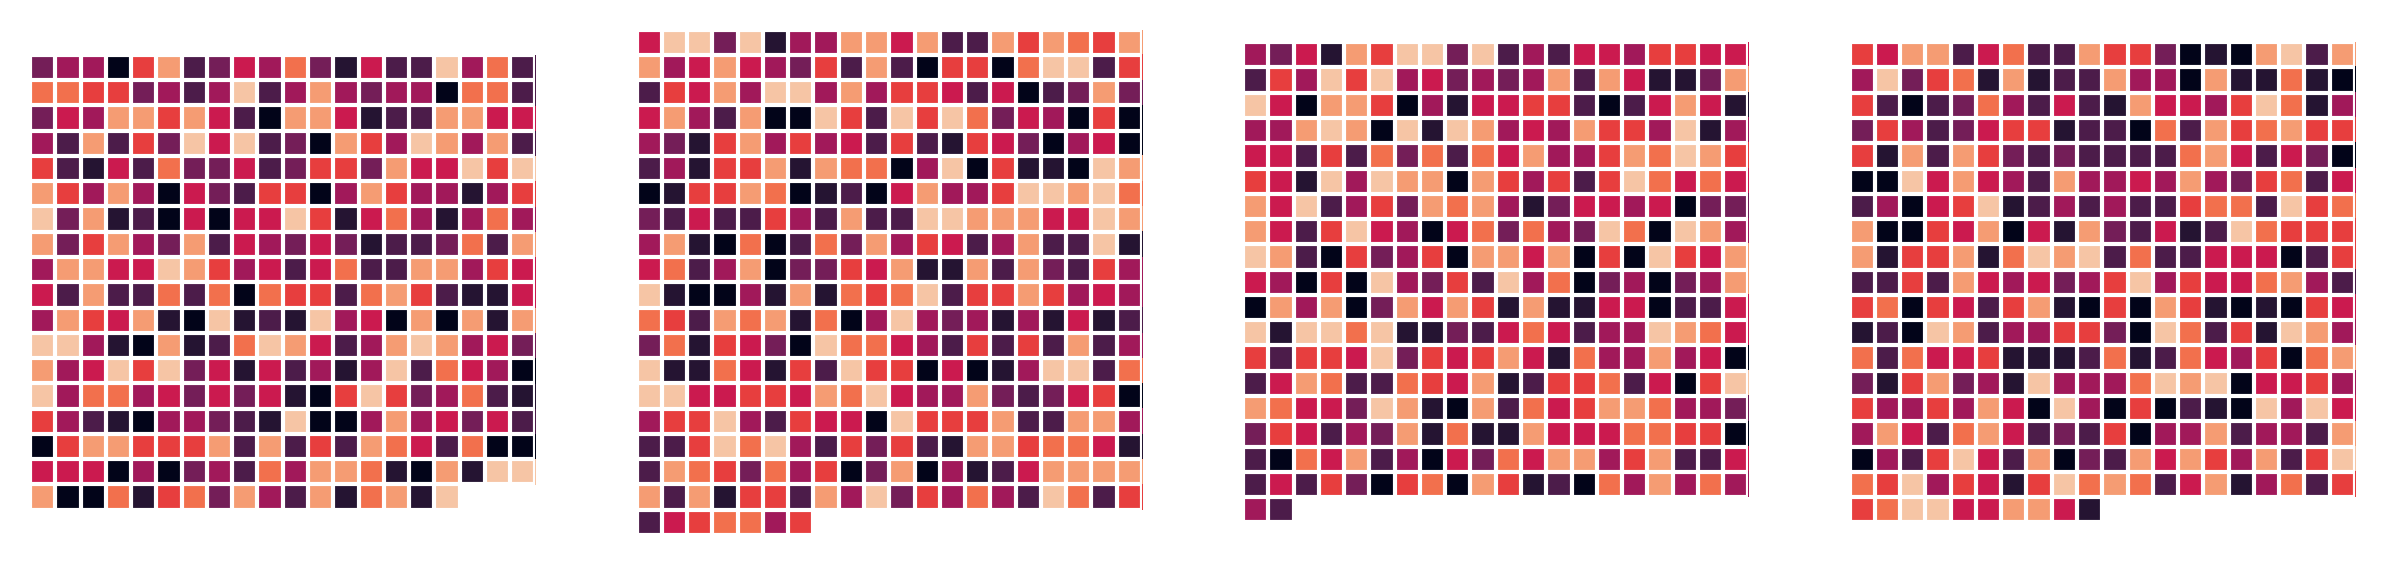

In [480]:
fig, axs = plt.subplots(1, 4, figsize=(10,6), dpi=300)
for i,ax in enumerate(axs):
    ax.imshow(partitionedData[i], cmap=discrete_viridis, vmin=-1, vmax=9)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks(np.arange(-0.5, (partitionedData[i]).shape[1]+0.5, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, (partitionedData[i]).shape[0]+0.5, 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
    ax.tick_params(which='minor', bottom=False, left=False)

plt.show()

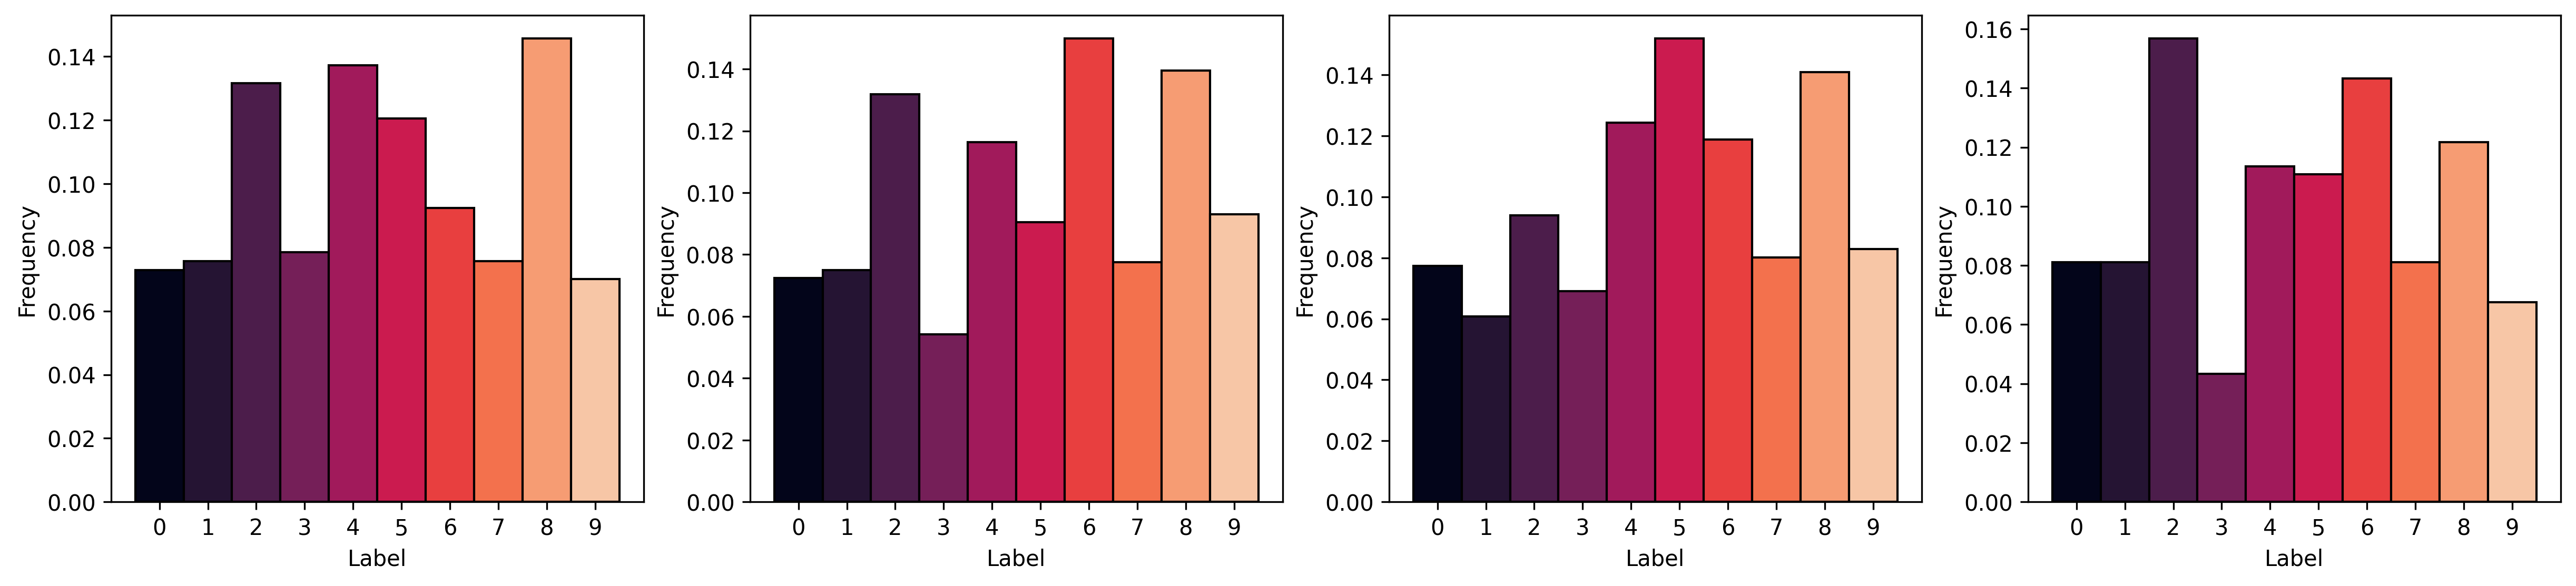

In [493]:
fig, axs = plt.subplots(1, 4, figsize=(20,4), dpi=300)
for i,ax in enumerate(axs):
    flat = partitionedData[i].flatten()
    N, bins, patches =ax.hist(flat,[-0.5+i for i in range(11)], density=True,lw=1,ec="k",fc=[0.8,0.8,0.8], alpha=1)
    for i in range(len(N)):
        patches[i].set_facecolor(colors[i+1])
    ax.set_xticks([i for i in range(10)])
    #ax.set_xticks(np.arange(-0.5, 9.5, 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
    ax.set_xlabel("Label")
    ax.set_ylabel("Frequency")


In [465]:
print("tes")

tes
